### **1. Data preprocessing (converting, removing null and NaN values etc.)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('countries.csv', sep=';')
df = df.drop(index=0) # Remove data types row

In [ ]:
# Convert data types
df['Country'] = df['Country'].astype('string')
num_cols = df.columns
num_cols = [x for x in num_cols if x != 'Country']
df[num_cols] = df[num_cols].astype(float)
df.dtypes

### **2. Data visualization**

##### Comparsion of GDP and Public debt (% of GDP) of top 15 countries by GDP 

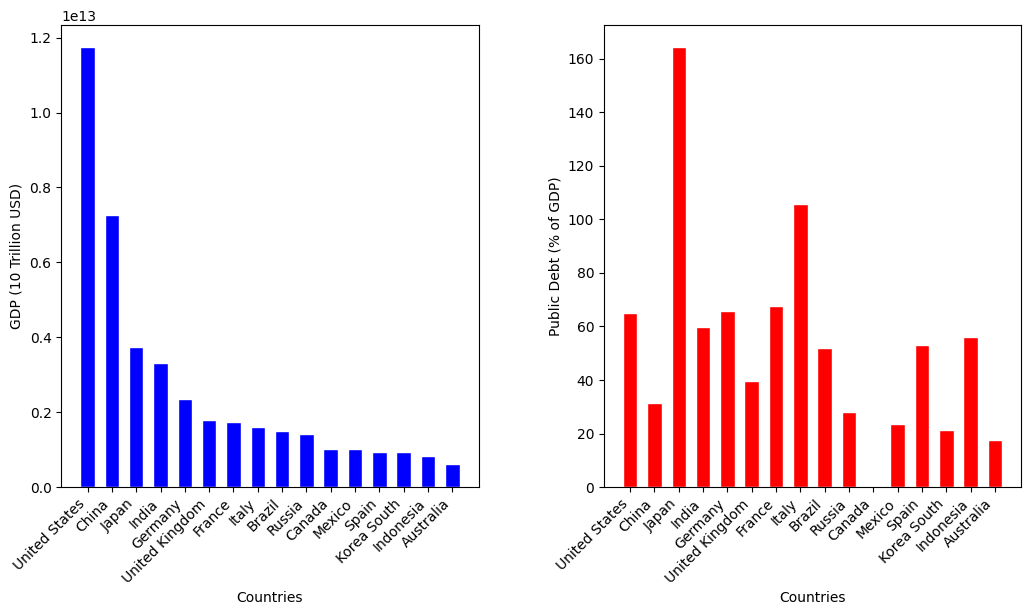

In [26]:
df_nn = df.dropna(axis=0, subset=['GDP'])
df_nn = df_nn.sort_values(by='GDP', ascending=False)

# Remove EU from set
eu = df_nn['Country'] == '#European Union'
df_nn = df_nn.drop(df_nn.index[eu])

countries = df_nn['Country'].head(16).to_list()
gdp = df_nn['GDP'].head(16).to_list()
public_debt = df_nn[f'Public debt(% of GDP)'].head(16).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(countries, gdp, color='blue', width=0.6, edgecolor='white')
ax1.set_xticks(range(len(countries)))
ax1.set_xticklabels(countries, rotation=45, ha='right')
ax1.set_xlabel('Countries')
ax1.set_ylabel('GDP (10 Trillion USD)')

ax2.bar(countries, public_debt, color='red', width=0.6, edgecolor='white')
ax2.set_xticks(range(len(countries)))
ax2.set_xticklabels(countries, rotation=45, ha='right')
ax2.set_xlabel('Countries')
ax2.set_ylabel(f'Public Debt (% of GDP)')

plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
plt.show()